<a href="https://colab.research.google.com/github/AY0ungKim/AI-Study/blob/main/Chapter_7_Overfitting%26Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*서울대학교 데이터사이언스대학원 머신러닝 및 딥러닝 수업 정리*

# Chapter 7. Overfitting & Regularization

## **1. Overfitting**

### Overfitting: Training을 하면서 **Training loss는 작아지나** **Evaluation loss는 더 커지는** 상황


- 아래 그림을 참고

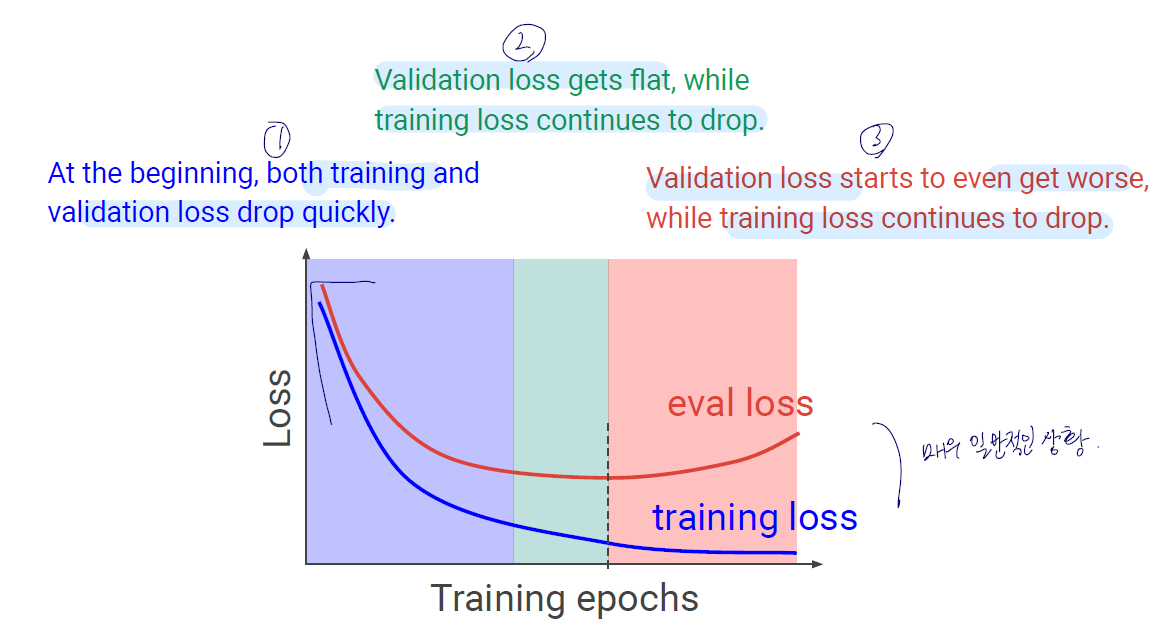

>> 파란색 부분: 어떤 데이터든, 초기 훈련은 **가장 일반적인 패턴**을 잡으므로 training loss, evaluation loss 둘다 감소

>> 초록색 부분: evaluation loss가 flat해지는 지점

>> 빨간색 부분: 일반적 패턴과 함께, training set에만 있는 **noise(그 데이터이기에 있는 minor한 패턴-일반화x)를 잡게 되므로** evaluation loss는 다시 증가함 (unseen test examples에 잘 적용이 안됨)


### Overfitting에 유의해야하는 경우

1.데이터가 high-dimensional인 경우

2. noisy한 feature의 경우


### Model capacity: model

- model이 너무 복잡한 경우 (아래 그림 참고), training data의 noise까지 잡을 수 있도록 충분한 model capacity를 가지는 경우 **과적합 가능성**이 높아지게 됨.

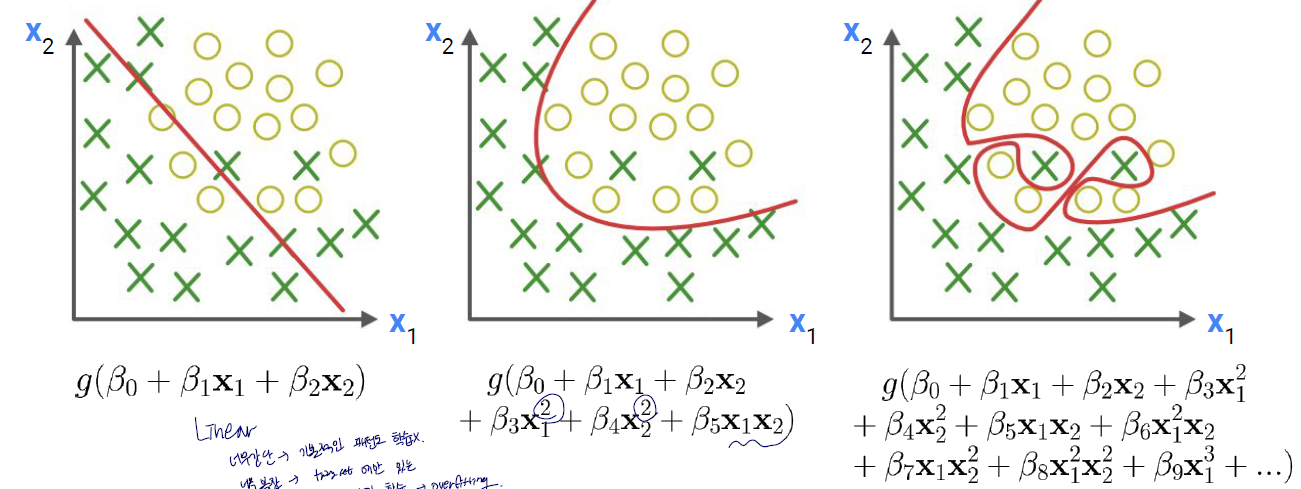

### Overfitting을 방지하는데 고려해야하는 것 두 가지

1. training을 언제 멈출 것인가?

2. model capacity에 대한 적당한 크기가 무엇인가?

## **2. Early stopping**

### - 기본 가정: i.i.d assumption 하에, 모든 데이터는 randomly split이라고 가정하기에, **training data, evaluation data, validation data가 모두 비슷한 확률 분포를 갖는다**고 가정

- 즉, 한번만 test해야하는 evaluation (test) set를 갖고는 여러번 training할 수 없으므로, validation으로 stopping point를 정해도 그 point는 test set의 point와 비슷할 것임!!

>> 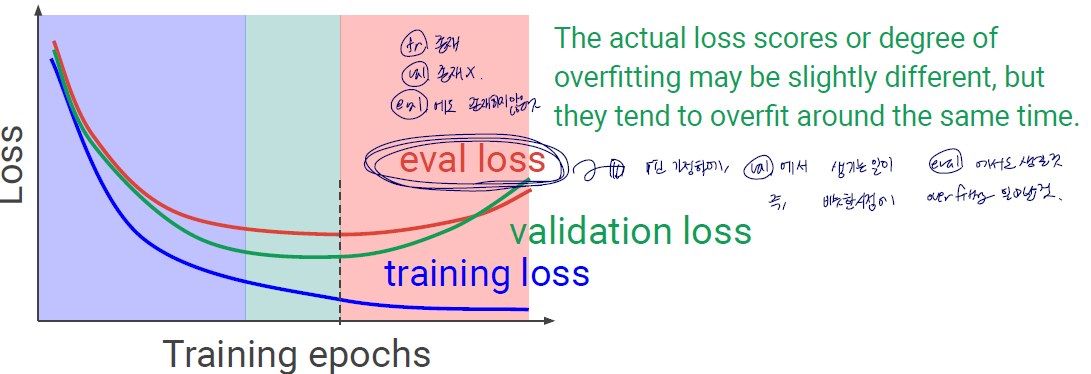

### - 언제 멈춰야하는 가?

- 위에 random 가정을 토대로, **validation set에서 loss 혹은 관심있는 estimator (e.g. classification accuracy)의 기울기가 변하기** 시작할 때

>> (cf) 보통 미니배치 하에 loss는 들쭉날쭉하므로, max training 횟수를 정해서 그래프 그려보고 판단함

## **3. Regularization**

- model의 적절한 capacity를 정하는 방법

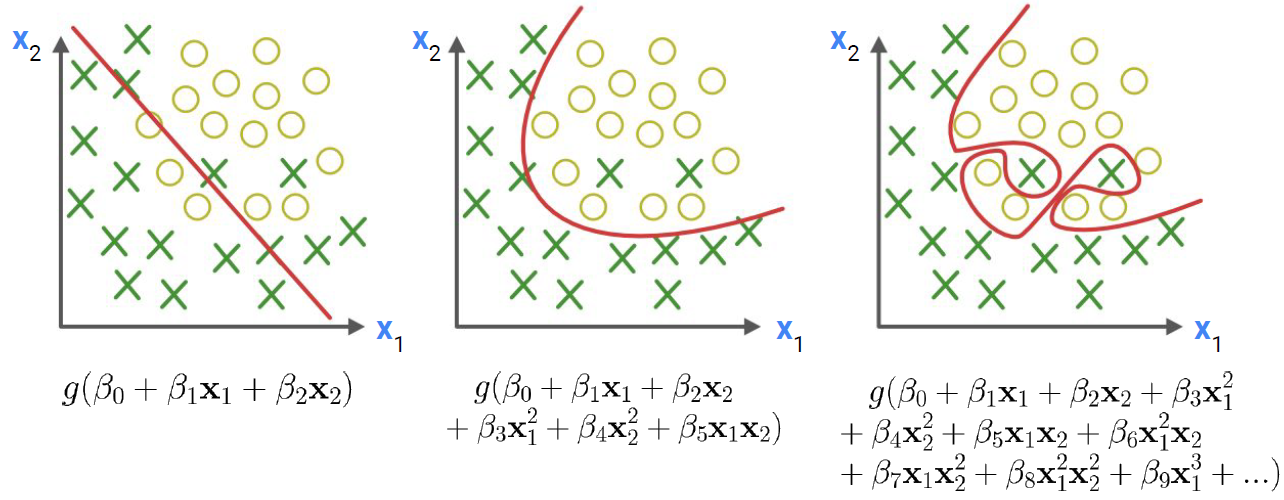

>> 위 그림에서 **0이 아닌 beta**가 많을수록 모델이 복잡해짐 (capacity가 커짐)

>> least validation error를 찾고자 모두 training 시키기에는 계산량이 너무 많음 -> 모든 beta가 포함된 **가장 복잡한 모델**을 만들고, 이 beta가 0인지를 추정하면 됨

>> 만약, 모델이 너무 복잡하지 않으려면, 많은 beta가 0이 되어야함

### **1) Ridge Regression**

- 기본 RSS에 **shrinkage penalty인 lambda(beta^2)**를 추가한 것

> shrinkage penalty가 최소화되려면, beta가 0에 가까워야 함

> tuning parametar lambda는 shrinking과 model estimation effect (penaly가 없는 상태의 RSS)의 상대적인 영향을 조절해줌

>> 만약 lambda가 무한대로 수렴하면, regulaization만 해주는 것

>> 만약 lambda가 0에 수렴하면, regularization은 안하고 penalty가 없는 모델이랑 같은

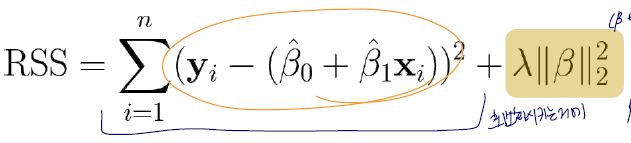


>> 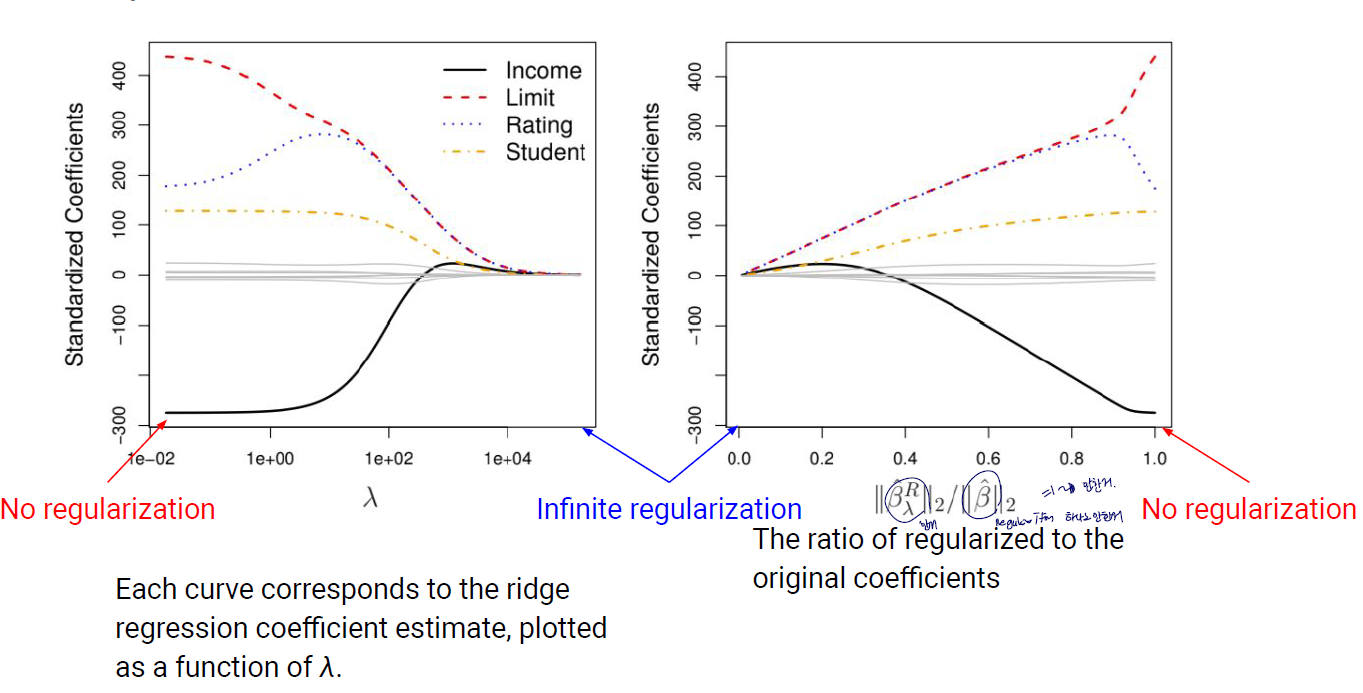

>> *만약에 변수들 간의 차원이 다른 경우,* 그대로 shrinkage penalty를 계산하면 잘못된 결과 나올 수 있음 -> 사전에 **표준화**해야함

>> 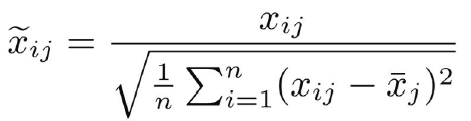


- regularization이 강할수록, 모델이 간단해지고, 과적합이 적어지고, 작은 variance (어떤 데이터냐에 따라 달라지는 모델), 큰 bias (너무 간단한 모델이라그 데이터만의 패턴을 잘 잡진 못함 flexible하지 않음)를 가지게 된다.


>> 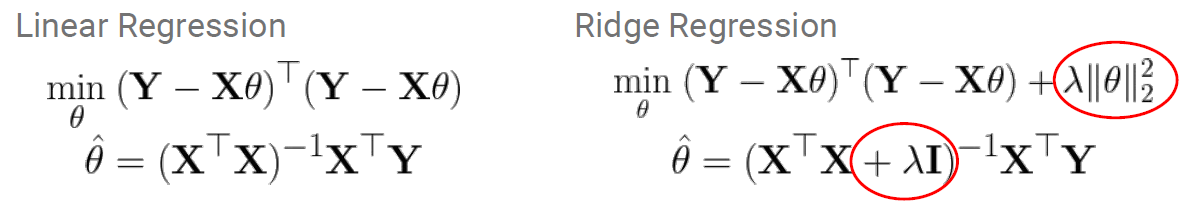

- 베타가 1,2가 존재할 때, 에러를 살펴보면, least square error에서 좀 더 키워서 ridge제약과 만나게 한다. (ridge의 제약이 제곱의 합이기때문에 원으로 표현된다.) 그래서 이 원과 딱 맞닿는 부분을 살펴보 거의 베타2가 0으로 가는걸 알 수 있다. 그래서 모델이 좀 더 단순화 되는 것을 살펴볼 수 있다. 제약이 무한대로 가면 베타1과2가 0이 되겠지만 이런 상황에서는 거의 0은 되지만 0이 아닌 값을가지는 것을 확인할 수 있다.

>> 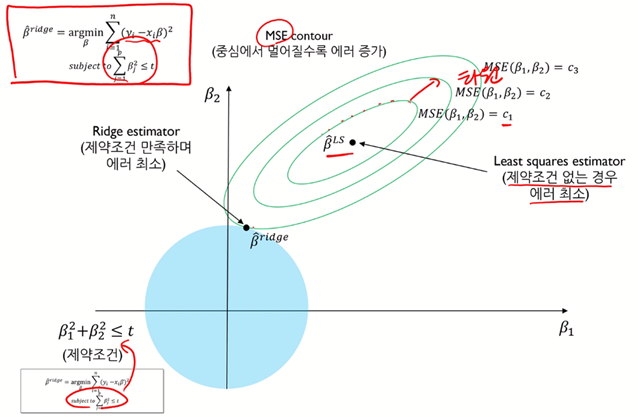

### **2) Lasso**

Ridge regression의 한계인 *모든 변수를 모델에 포함해야한다*는 것을 극복한 방법

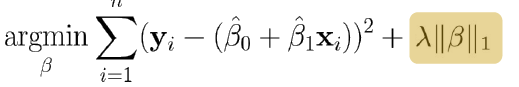



- penalty 부분에 제곱이 아닌 절댓값을 이용한 것

- 이 방법을 이용하면 **특정 predictor의 parameter가 0이 되도록** 조정할 수 있음. (variable selection) - *sparse model*

> 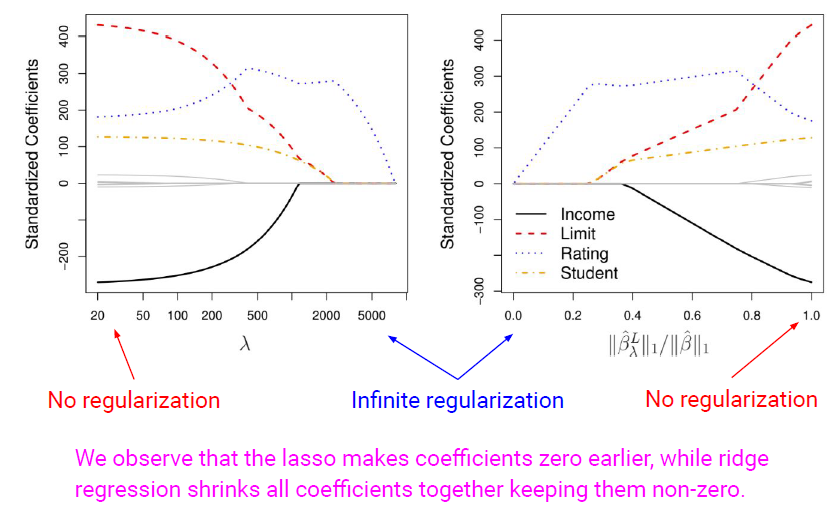

- 아래 그림을 보면, L1 penalty가 없는 least square solution과 LASSO제약조건이 만나는 점이 0이 될 수도 있음!

> 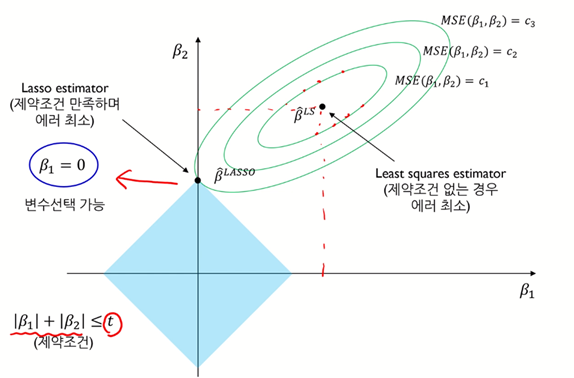

### **3) Ridge regression과 Lasso의 차이점**

람다가 매우 클 때, Lasso의 경우 bias를 제외한 coefficient들이 0이 되지만, Ridge의 경우 계속 줄어들지 0이 되진 않는다.



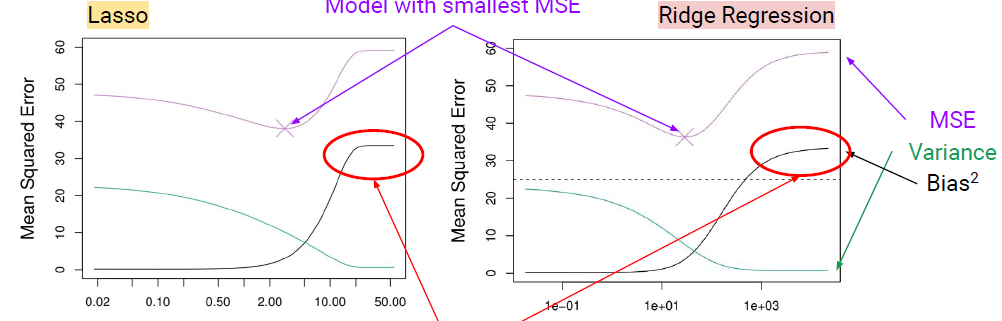

- 그러면 둘 중 뭘 쓰는게 가장 나은가?

> **cross-validation**을 이용하여


- hyperparameter 람다는 어떻게 정하는가?

> 각 람다에 대한 **cross-validation error rate**을 계산하여 최소가 되는 람다 찾는다.


>> 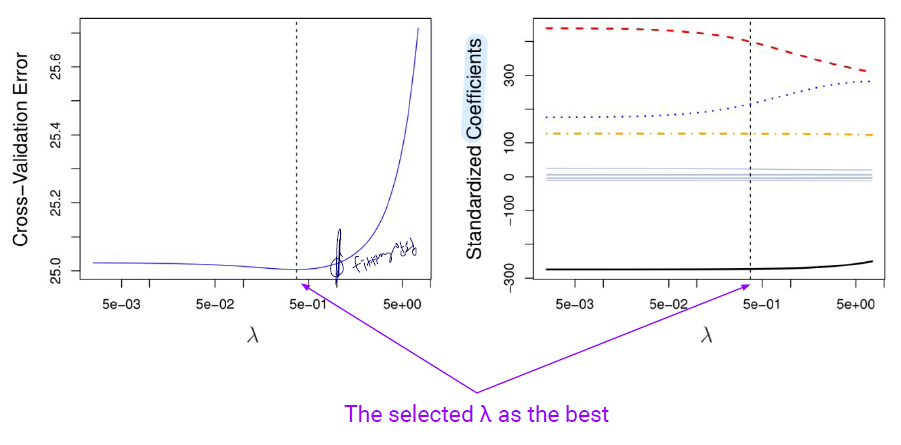

## **! 기억해야하는 것**


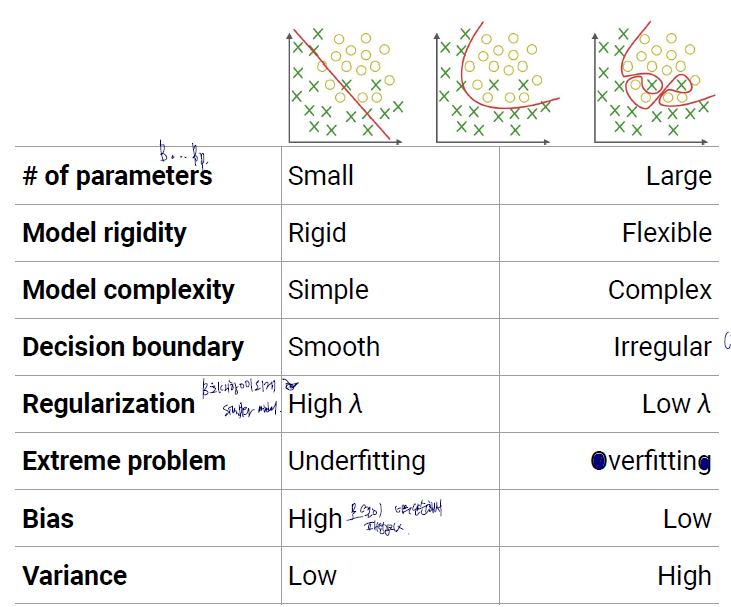

- 해석: **parameter의 수가 많아**지면, 데이터 하나하나를 잘 잡기때문에 **flexible**해지고, parameter가 많아서 모델이 **complex**해지고, decision boundary가 선형이 아닌 꾸불꾸불 (**Irregular**)하며, 정규화를 위한 **람다가 작아**지며, noise를 잡을 수 있기에 **overfitting**의 문제가 있으며, 그 데이터 자체의 패턴은 잘 잡기에 **Bias가 작아**지고, 다른 데이터들을 이용했을 때 다른 모델을 추정할 수도 있기에 **Variance가 크다**!